/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TRAIN (867,)
TEST (180,)
TRAIN X (787, 80, 1)
TRAIN Y (787, 1)
LOSS: square  OPT: rms
DataSet X (787, 80, 1)
DataSet Y (787, 1)
DataSet num_examples 787
Step 1: Acc= 0.273875, LR= 0.100000
Validation: 0.162242
Step 100: Acc= 0.021352, LR= 0.100000
Validation: 0.011259
Step 200: Acc= 0.018585, LR= 0.097000
Validation: 0.015401
Step 300: Acc= 0.059829, LR= 0.097000
Validation: 0.115567
Step 400: Acc= 0.004524, LR= 0.094090
Validation: 0.000666
Step 500: Acc= 0.003784, LR= 0.094090
Validation: 0.007012
Step 600: Acc= 0.000254, LR= 0.091267
Validation: 0.000478
Step 700: Acc= 0.012049, LR= 0.091267
Validation: 0.003859
Step 800: Acc= 0.022897, LR= 0.088529
Validation: 0.011660
Step 900: Acc= 0.030038, LR= 0.088529
Validation: 0.043796
Step 1000: Acc= 0.020610, LR= 0.085873
Validation: 0.036969
Test: 0.026498


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


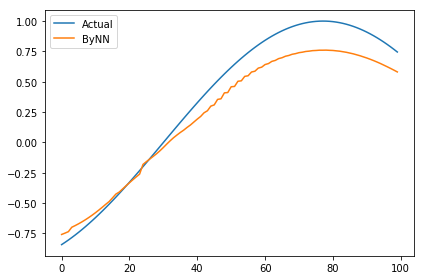

In [1]:
import numpy as np

import DATA
import LSTM
import PLOT

'''
1차원 데이타의 시계열 LSTM 학습/테스트
'''

def lstm_with_sin():
  orgdata = np.linspace(0, 40, 1200, dtype=np.float32)
  sindata = np.sin(orgdata)
  
  train, validation, test = DATA.split_data(sindata)
  WINDOWSIZE = 80
  train_x, train_y = DATA.getSeriesData(train, WINDOWSIZE)
  valid_x, valid_y = DATA.getSeriesData(validation, WINDOWSIZE)
  test_x, test_y = DATA.getSeriesData(test, WINDOWSIZE)
  
  print('TRAIN', train.shape)
  print('TEST', test.shape)
  print('TRAIN X', train_x.shape)
  print('TRAIN Y', train_y.shape)
  
  lstm = LSTM.LSTM(1, WINDOWSIZE, 4, 1, loss='square', opt='rms')
  lstm.set_validation_data(valid_x, valid_y, valid_stop=0.0001)
  lstm.run(train_x, train_y, batch_size=100, epochs=1000)
  lstm.do_test(test_x, test_y)
  predict_y = lstm.predict(test_x)
  chart = PLOT.LineChart()
  chart.line(test_y, 'Actual')
  chart.line(predict_y, 'ByNN')
  chart.show()


if __name__ == '__main__':
  lstm_with_sin()


